In [2]:
import pandas as pd
import numpy as np

In [3]:
ap_data = pd.read_excel("exact_data_92024_log.xlsx")
ap_data = ap_data.drop('datetime',axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'exact_data_92024_log.xlsx'

In [ ]:
ap_data.info()

In [ ]:
ap_data.reset_index(inplace=True, drop=True)
ap_data.head(-1)

In [ ]:
air_data = pd.read_excel(r"air_data\air92024.xlsx")

In [ ]:
air_data.info()

In [ ]:
air_data.reset_index(inplace=True, drop=True)
air_data

In [ ]:
#파일 불러오기
real_air = pd.read_csv('용봉동2026.csv', engine='python')

In [ ]:
real_air = real_air[:120]

In [ ]:
real_air.reset_index(inplace=True, drop=True)
real_air.head(-1)

In [ ]:
result = pd.concat([ap_data,air_data,real_air], axis = 1)

In [ ]:
result = result.drop(['day', 'time', 'timestamp(Asia/Seoul)'], axis = 1)

In [ ]:
result = result.drop(120, axis = 0)

In [ ]:
result

In [ ]:
result['date_day'] = result['date'].dt.day
result['date_hour'] = result['date'].dt.hour
result['date_weekday'] = result['date'].dt.dayofweek

In [ ]:
result = result.set_index('date')

In [4]:
result

NameError: name 'result' is not defined

In [5]:
result.info()

NameError: name 'result' is not defined

In [6]:
result.shape


NameError: name 'result' is not defined

In [7]:
result.corr()

NameError: name 'result' is not defined

In [8]:
#https://wikidocs.net/45481
#https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
#https://gomguard.tistory.com/173

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(data = result.corr(), annot=True,
fmt = '.2f', linewidths = .5, cmap = 'Blues')

NameError: name 'result' is not defined

<Figure size 1440x1440 with 0 Axes>

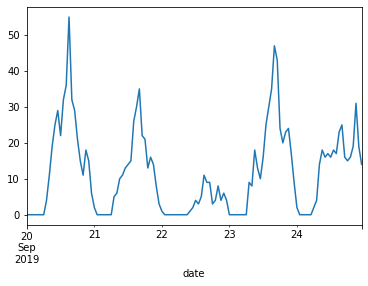

In [22]:
result['all_num']['2019-09-20' : '2019-09-25'].plot()

In [1]:
result.info()

NameError: name 'result' is not defined

In [23]:
target_data = 'all_num'
shift_days = 1
shift_steps = shift_days * 24

In [24]:
result_targets = result[target_data].shift(-shift_steps)

In [25]:
result_targets

date
2019-09-20 00:00:00    2.0
2019-09-20 01:00:00    0.0
2019-09-20 02:00:00    0.0
2019-09-20 03:00:00    0.0
2019-09-20 04:00:00    0.0
                      ... 
2019-09-24 19:00:00    NaN
2019-09-24 20:00:00    NaN
2019-09-24 21:00:00    NaN
2019-09-24 22:00:00    NaN
2019-09-24 23:00:00    NaN
Name: all_num, Length: 120, dtype: float64

In [26]:
x_data = result.values[0:-shift_steps]
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (96, 15)


In [27]:
y_data = result_targets.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (96,)


In [28]:
num_data = len(x_data)
num_data


96

In [29]:
train_split = 0.9

In [30]:
num_train = int(train_split * num_data)
num_train

86

In [31]:
num_test = num_data - num_train
num_test

10

In [32]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

96

In [33]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

96

In [34]:
num_x_signals = x_data.shape[1]
num_y_signals = 1
num_x_signals

15

In [35]:
y_data

array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  6., 10., 11., 13., 14.,
       15., 26., 30., 35., 22., 21., 13., 16., 14.,  8.,  3.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  3.,  5.,
       11.,  9.,  9.,  3.,  4.,  8.,  4.,  6.,  4.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  9.,  8., 18., 13., 10., 16., 25., 30., 35., 47.,
       43., 24., 20., 23., 24., 17.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,
        2.,  4., 14., 18., 16., 17., 16., 18., 17., 23., 25., 16., 15.,
       16., 19., 31., 19., 14.])

In [36]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 4168.2


In [37]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

In [38]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [39]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [40]:
x_test_scaled = x_scaler.transform(x_test)


In [41]:
y_scaler = MinMaxScaler()
y_train_scaled = y_train.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

In [42]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(86, 15)
(86, 1)


In [43]:
def batch_generator(batch_size, sequence_length):
     """
     Generator function for creating random batches of training-data.
     """
     # Infinite loop.
     while True:
         # Allocate a new array for the batch of input-signals.
         x_shape = (batch_size, sequence_length, num_x_signals)
         x_batch = np.zeros(shape=x_shape, dtype=np.float16)
         # Allocate a new array for the batch of output-signals.
         y_shape = (batch_size, sequence_length, num_y_signals)
         y_batch = np.zeros(shape=y_shape, dtype=np.float16)
         # Fill the batch with random sequences of data.
         for i in range(batch_size):
             # Get a random start-index.
             # This points somewhere into the training-data.
             idx = np.random.randint(num_train - sequence_length)

             # Copy the sequences of data starting at this index.
             x_batch[i] = x_train_scaled[idx:idx+sequence_length]
             y_batch[i] = y_train_scaled[idx:idx+sequence_length]

         yield (x_batch, y_batch)

In [44]:
batch_size = 12
sequence_length = 24 * 3 #5일
sequence_length

72

In [45]:
generator = batch_generator(batch_size=batch_size,sequence_length=sequence_length)

In [46]:
x_batch, y_batch = next(generator)

In [47]:
print(x_batch.shape)
print(y_batch.shape)

(12, 72, 15)
(12, 72, 1)


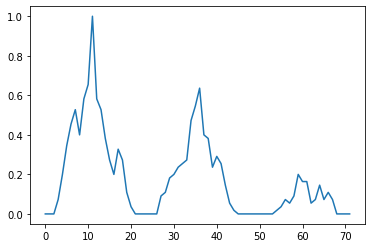

In [48]:
batch = 0 # First sequence in the batch.
signal = 0 # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

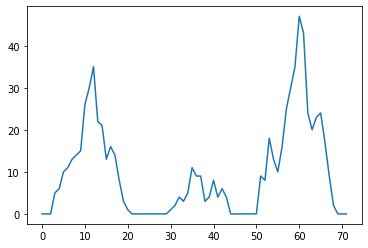

In [49]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [50]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
 np.expand_dims(y_test_scaled, axis=0))

In [51]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

import pandas as pd
import numpy as np
import tensorflow as tf

Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\tensor

In [52]:
model = Sequential()
model.add(GRU(units=256,
 return_sequences=True,
 input_shape=(None, num_x_signals,)))
model.add(Dense(1, activation='sigmoid'))

W1017 19:33:27.331869 17808 deprecation.py:506] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
warmup_steps = 10

In [54]:
def loss_mse_warmup(y_true, y_pred):
     y_true_slice = y_true[:, warmup_steps:, :]
     y_pred_slice = y_pred[:, warmup_steps:, :]
     # These sliced tensors both have this shape:
     # [batch_size, sequence_length - warmup_steps, num_y_signals]
     # Calculate the MSE loss for each value in these tensors.
     # This outputs a 3-rank tensor of the same shape.
     loss = tf.losses.mean_squared_error(labels=y_true_slice,
     predictions=y_pred_slice)
     # Keras may reduce this across the first axis (the batch)
     # but the semantics are unclear, so to be sure we use
     # the loss across the entire tensor, we reduce it to a
     # single scalar with the mean function.
     loss_mean = tf.reduce_mean(loss)
     return loss_mean
        

In [55]:
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

W1017 19:33:27.724980 17808 deprecation.py:323] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         208896    
_________________________________________________________________
dense (Dense)                (None, None, 1)           257       
Total params: 209,153
Trainable params: 209,153
Non-trainable params: 0
_________________________________________________________________


In [57]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
 monitor='val_loss',
verbose=1,
save_weights_only=True,
save_best_only=True)

In [58]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
 patience=5, verbose=1)

In [59]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
 histogram_freq=0,
write_graph=False)

In [60]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
 factor=0.1,
min_lr=1e-4,
patience=0,
verbose=1)

In [61]:
callbacks = [callback_early_stopping,
 callback_checkpoint,
 callback_tensorboard,
 callback_reduce_lr]

In [62]:
%%time
model.fit_generator(generator=generator,
 epochs=20,
 steps_per_epoch=100,
 validation_data=validation_data,
 callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 201.7977
Epoch 00001: val_loss improved from inf to 0.00000, saving model to 23_checkpoint.keras
100/100 [==============================] - 27s 272ms/step - loss: 201.8632 - val_loss: 0.0000e+00
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 200.5883
Epoch 00002: val_loss did not improve from 0.00000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 24s 239ms/step - loss: 200.6570 - val_loss: 0.0000e+00
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 199.5872
Epoch 00003: val_loss did not improve from 0.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 24s 235ms/step - loss: 199.5994 - val_loss: 0.0000e+00
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 200.2273
Epoch 00004: val_loss did not improve from 0.00000
1

In [63]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
 y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 5ms/sample - loss: 0.0000e+00


In [64]:
print("loss (test-set):", result)

loss (test-set): 0.0
